In [1]:
%matplotlib inline

In [2]:
%run -n VehicleDetection.py

The scikit-learn version is 0.18.1.


In [3]:
vehicleDetection = VehicleDetection(color_space = 'YCrCb', # Color space base for features
                                    spatial_size = (8, 8), # Spatial binning dimensions
                                    hist_bins = 32,    # Number of histogram bins
                                    orient = 9,  # HOG orientations
                                    pix_per_cell = 8, # HOG pixels per cell
                                    cell_per_block = 2, # HOG cells per block
                                    spatial_feat = True, # Spatial features on or off
                                    hist_feat = True, # Histogram features on or off
                                    hog_feat = True, # HOG features on or off
                                    overlap = 56/64, # Sliding windows overlap
                                    x_start_stop= [400, None], # Min and max in x to search in slide_window()
                                    y_start_stop = [400, 656], # Min and max in y to search in slide_window()
                                    win_sizes = [[128, 400, 656]],
                                                #[[64, 600, 464], # Sizes and margins for sliding windows
                                                # [128, 550, 592], # [win_size, xstart, ystop]
                                                # [192, 450, 656],
                                                # [256, 350, 656]], 
                                    heatmap_threshold = 2, # hotmap threshold
                                    test_images = 'test_images/*.jpg', # Test images
                                    train_cars = '../images/vehicles_smallset/**/*.jpeg', # Initialize training cars images
                                    train_notcars = '../images/non-vehicles_smallset/**/*.jpeg') # Initialize training non cars images

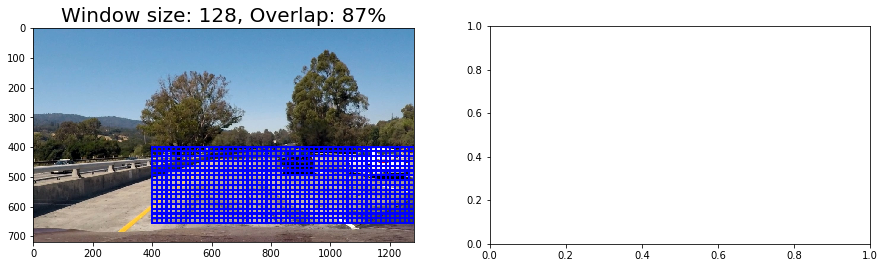

In [4]:
vehicleDetection.draw_sliding_windows()

In [5]:
vehicleDetection.train()

Using: 9 orientations 8 pixels per cell and 2 cells per block
Feature vector length: 5580
0.33 Seconds to train SVC...
Test Accuracy of SVC =  0.9935


In [6]:
vehicleDetection.draw_detected_cars_multiscale()

TypeError: 'NoneType' object is not iterable

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [ ]:
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(vehicleDetection.pipeline) #NOTE: this function expects color images!!
%time clip.write_videofile('project_video_output.mp4', audio=False)